Чернобаев Андрей Александрович М8О-114М-23

# Классификация Oxford Pets

Обучим сеть для классификации исходного датасета [Oxford-IIIT Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/). Загрузите датасет с Kaggle.

In [122]:
first_launch = False

In [123]:
import os

if not os.path.exists('images'):
    !wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
    !tar xfz images.tar.gz
    !rm images.tar.gz

    first_launch = True

In [124]:
import random
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

folder_name = 'images'

In [125]:
if first_launch:
    for fn in os.listdir(folder_name):
        cls = fn[:fn.rfind('_')].lower()
        os.makedirs(os.path.join(folder_name,cls), exist_ok = True)
        os.replace(os.path.join(folder_name,fn), os.path.join(folder_name, cls,fn))

Для визуализации изображений используйте функцию:

In [126]:
def display_images(l,titles=None,fontsize=12):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

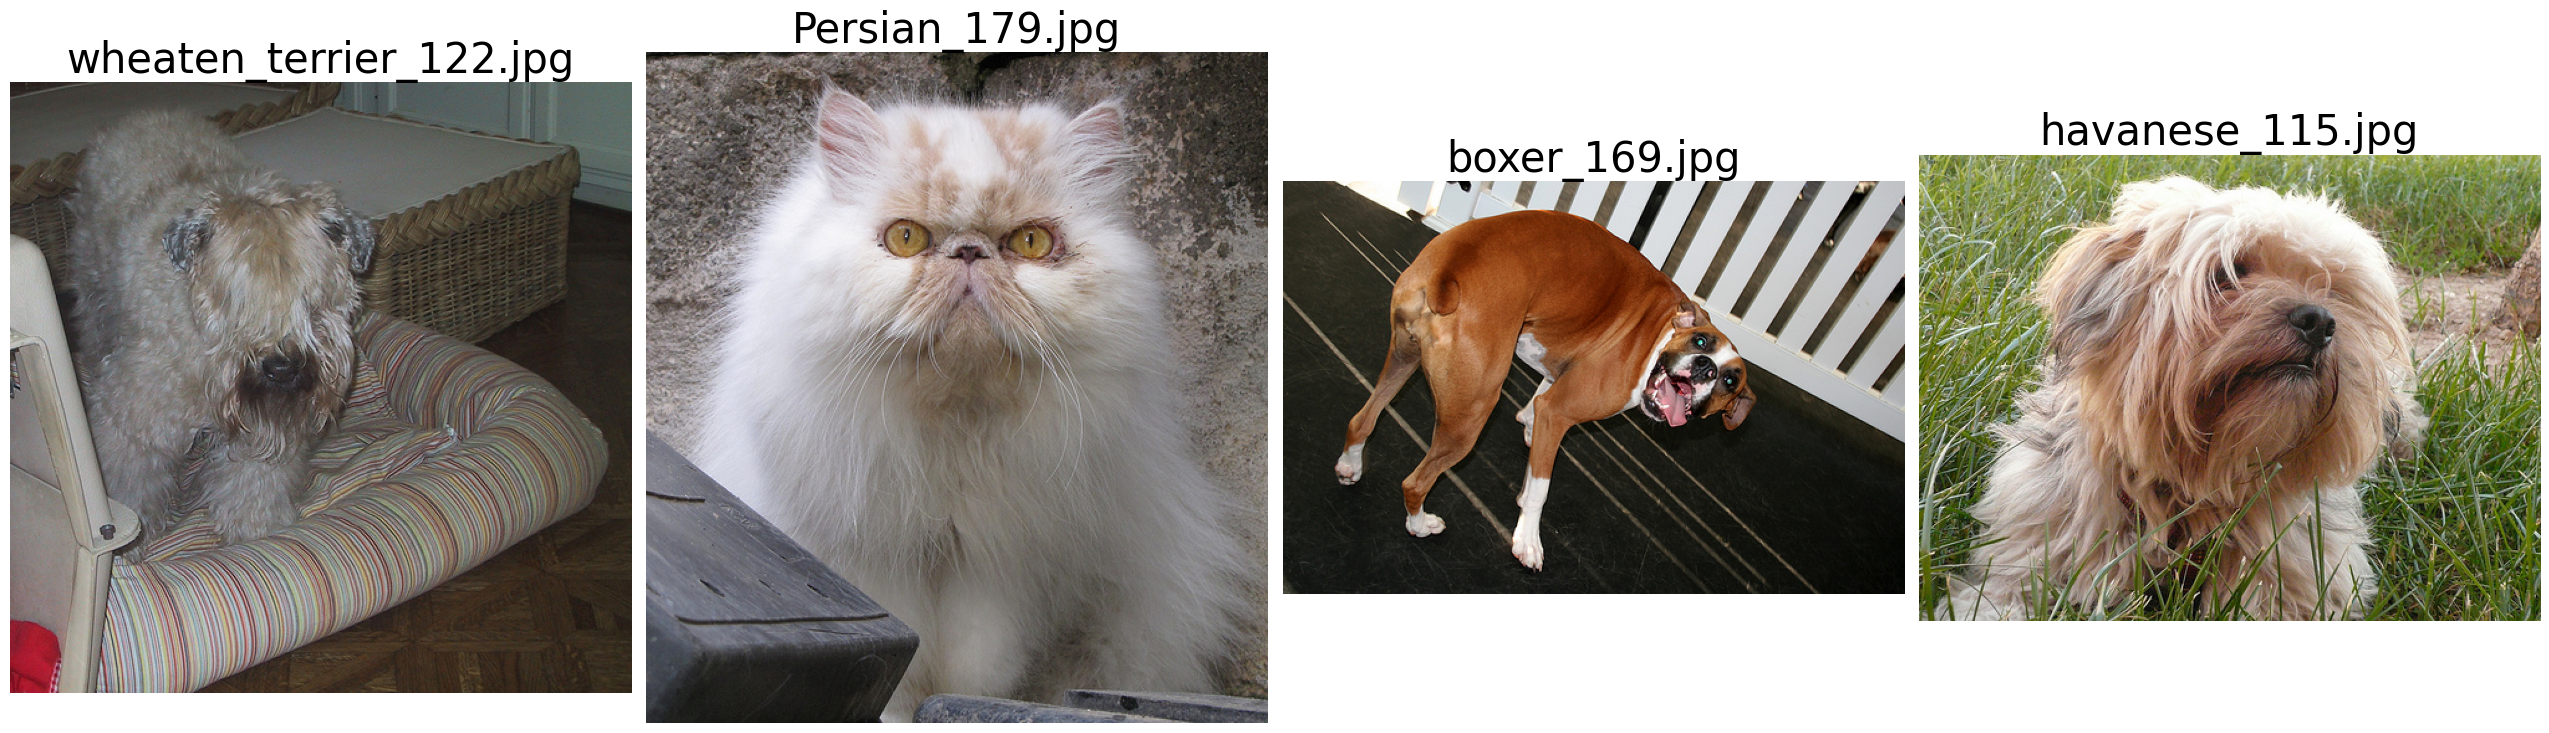

In [127]:
number_of_pictures = 4

folders = [f.path for f in os.scandir(folder_name) if f.is_dir()][:number_of_pictures]
fnames = []
for i in range(number_of_pictures):
    images = [f for f in os.listdir(folders[i]) if os.path.isfile(os.path.join(folders[i], f))]
    img = random.choice(images)
    rel_path = os.path.join(folders[i], img)
    fnames.append(rel_path)
titles = [os.path.basename(x) for x in fnames]
display_images([Image.open(x) for x in fnames], titles=titles, fontsize=30)

In [128]:
num_classes = len(os.listdir(folder_name))
num_classes

37

In [129]:
import tensorflow as tf

image_size = 224
batch_size = 32


my_seed = 322

train, test = [
    tf.keras.preprocessing.image_dataset_from_directory(
    folder_name,
    image_size = (image_size,image_size),
    validation_split = 0.2,
    subset = s,
    batch_size = batch_size,
    seed = my_seed)
    for s in ['training','validation']]

class_names = train.class_names

Found 7390 files belonging to 37 classes.
Using 5912 files for training.
Found 7390 files belonging to 37 classes.
Using 1478 files for validation.


<h3>VGG-16</h3>

In [130]:
vgg_16 = tf.keras.applications.VGG16(include_top = False, input_shape = (224, 224, 3))

In [131]:
vgg_16_model = tf.keras.models.Sequential()
vgg_16_model.add(tf.keras.layers.Lambda(tf.keras.applications.vgg16.preprocess_input))
vgg_16_model.add(vgg_16)
vgg_16_model.add(tf.keras.layers.Flatten())
vgg_16_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

vgg_16_model.layers[1].trainable = False

Epoch 1/3
110/185 [================>.............] - ETA: 5s - loss: 21.4443 - acc: 0.5832

Corrupt JPEG data: premature end of data segment


174/185 [===========================>..] - ETA: 0s - loss: 19.1593 - acc: 0.6347

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


185/185 [==============================] - 17s 86ms/step - loss: 18.9784 - acc: 0.6404 - val_loss: 13.4948 - val_acc: 0.7585
Epoch 2/3
110/185 [================>.............] - ETA: 5s - loss: 3.8790 - acc: 0.9136

Corrupt JPEG data: premature end of data segment


174/185 [===========================>..] - ETA: 0s - loss: 4.1919 - acc: 0.9097

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


185/185 [==============================] - 15s 82ms/step - loss: 4.1991 - acc: 0.9095 - val_loss: 14.3398 - val_acc: 0.7869
Epoch 3/3
110/185 [================>.............] - ETA: 5s - loss: 2.1975 - acc: 0.9526

Corrupt JPEG data: premature end of data segment


174/185 [===========================>..] - ETA: 0s - loss: 2.1766 - acc: 0.9517

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


185/185 [==============================] - 16s 85ms/step - loss: 2.2381 - acc: 0.9513 - val_loss: 16.3463 - val_acc: 0.7788


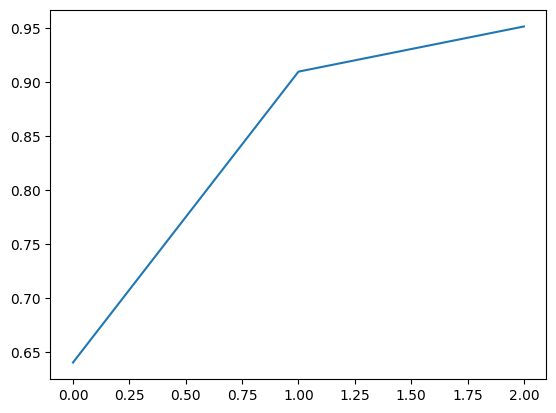

In [132]:
vgg_16_model.compile(loss = 'sparse_categorical_crossentropy', metrics=['acc'], optimizer='adam')
h = vgg_16_model.fit(train, validation_data = test, epochs=3)
plt.plot(h.history['acc'])

In [133]:
def calc_accuracy(test, k, model):
  correct = 0
  total = 0
  for t, l in test:
      r = model(t)
      res = tf.nn.in_top_k(predictions = r, targets = l, k = k)
      correct += tf.reduce_sum(tf.cast(res,tf.int32))
      total += len(l)
  res = correct / total
  return res.numpy()

VGG-16 Top 3 Accuracy

In [134]:
calc_accuracy(test, 3, vgg_16_model)

0.9600811907983762

VGG-16 Top 5 Accuracy

In [135]:
calc_accuracy(test, 5, vgg_16_model)

0.9844384303112313

<h3>VGG-19</h3>

In [136]:
vgg_19 = tf.keras.applications.VGG19(include_top=False, input_shape=(224,224,3))

In [137]:
vgg_19_model = tf.keras.models.Sequential()
vgg_19_model.add(tf.keras.layers.Lambda(tf.keras.applications.vgg19.preprocess_input))
vgg_19_model.add(vgg_19)
vgg_19_model.add(tf.keras.layers.Flatten())
vgg_19_model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

vgg_19_model.layers[1].trainable = False

Epoch 1/3
109/185 [================>.............] - ETA: 5s - loss: 19.8030 - acc: 0.5851

Corrupt JPEG data: premature end of data segment


173/185 [===========================>..] - ETA: 0s - loss: 17.2636 - acc: 0.6432

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


185/185 [==============================] - 19s 98ms/step - loss: 17.0446 - acc: 0.6499 - val_loss: 13.6410 - val_acc: 0.7618
Epoch 2/3
109/185 [================>.............] - ETA: 5s - loss: 3.4729 - acc: 0.9163

Corrupt JPEG data: premature end of data segment


173/185 [===========================>..] - ETA: 0s - loss: 3.7326 - acc: 0.9137

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


185/185 [==============================] - 18s 100ms/step - loss: 3.7491 - acc: 0.9139 - val_loss: 13.5914 - val_acc: 0.7950
Epoch 3/3
109/185 [================>.............] - ETA: 6s - loss: 1.7236 - acc: 0.9573

Corrupt JPEG data: premature end of data segment


173/185 [===========================>..] - ETA: 0s - loss: 1.8544 - acc: 0.9556

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


185/185 [==============================] - 19s 101ms/step - loss: 1.8348 - acc: 0.9555 - val_loss: 17.8820 - val_acc: 0.7909


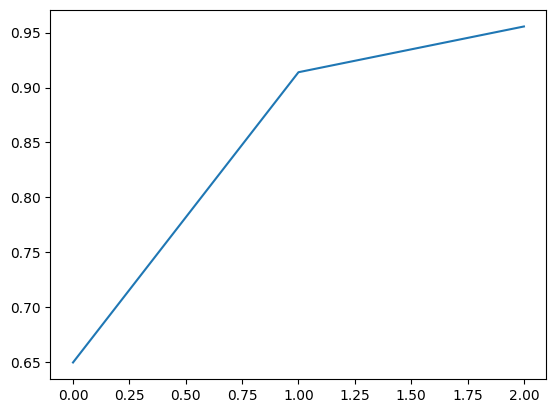

In [138]:
vgg_19_model.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], optimizer='adam')
h = vgg_19_model.fit(train,validation_data = test, epochs = 3)
plt.plot(h.history['acc'])

VGG-19 Top 3 Accuracy

In [139]:
calc_accuracy(test, 3, vgg_19_model)

0.9668470906630582

VGG-19 Top 5 Accuracy

In [140]:
calc_accuracy(test, 5, vgg_19_model)

0.9939106901217862

<h3>Resnet</h3>

In [141]:
resnet = tf.keras.applications.ResNet50(include_top = False, input_shape = (224,224,3))

In [142]:
resnet_model = tf.keras.models.Sequential()
resnet_model.add(tf.keras.layers.Lambda(tf.keras.applications.resnet50.preprocess_input))
resnet_model.add(resnet)
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

resnet_model.layers[1].trainable = False

Epoch 1/3
110/185 [================>.............] - ETA: 4s - loss: 7.7648 - acc: 0.6653

Corrupt JPEG data: premature end of data segment


174/185 [===========================>..] - ETA: 0s - loss: 6.9079 - acc: 0.7170

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


185/185 [==============================] - 18s 81ms/step - loss: 6.9912 - acc: 0.7202 - val_loss: 7.3337 - val_acc: 0.7930
Epoch 2/3
110/185 [================>.............] - ETA: 4s - loss: 1.7018 - acc: 0.9310

Corrupt JPEG data: premature end of data segment


174/185 [===========================>..] - ETA: 0s - loss: 1.8596 - acc: 0.9264

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


185/185 [==============================] - 14s 73ms/step - loss: 1.8750 - acc: 0.9257 - val_loss: 6.8435 - val_acc: 0.8275
Epoch 3/3
110/185 [================>.............] - ETA: 4s - loss: 0.7436 - acc: 0.9693

Corrupt JPEG data: premature end of data segment


174/185 [===========================>..] - ETA: 0s - loss: 0.7875 - acc: 0.9655

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


185/185 [==============================] - 14s 76ms/step - loss: 0.7711 - acc: 0.9660 - val_loss: 7.6601 - val_acc: 0.8342


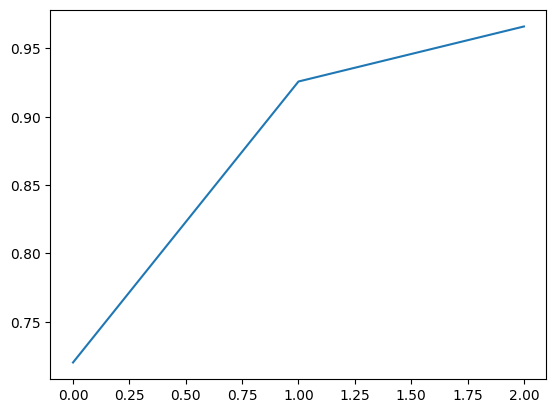

In [143]:
resnet_model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['acc'], optimizer = 'adam')
h = resnet_model.fit(train, validation_data = test, epochs = 3)
plt.plot(h.history['acc'])

ResNet Top 3 Accuracy

In [144]:
calc_accuracy(test, 3, resnet_model)

0.9566982408660352

ResNet Top 5 Accuracy

In [145]:
calc_accuracy(test, 5, resnet_model)

0.9844384303112313

1/1 [==============================] - 1s 700ms/step


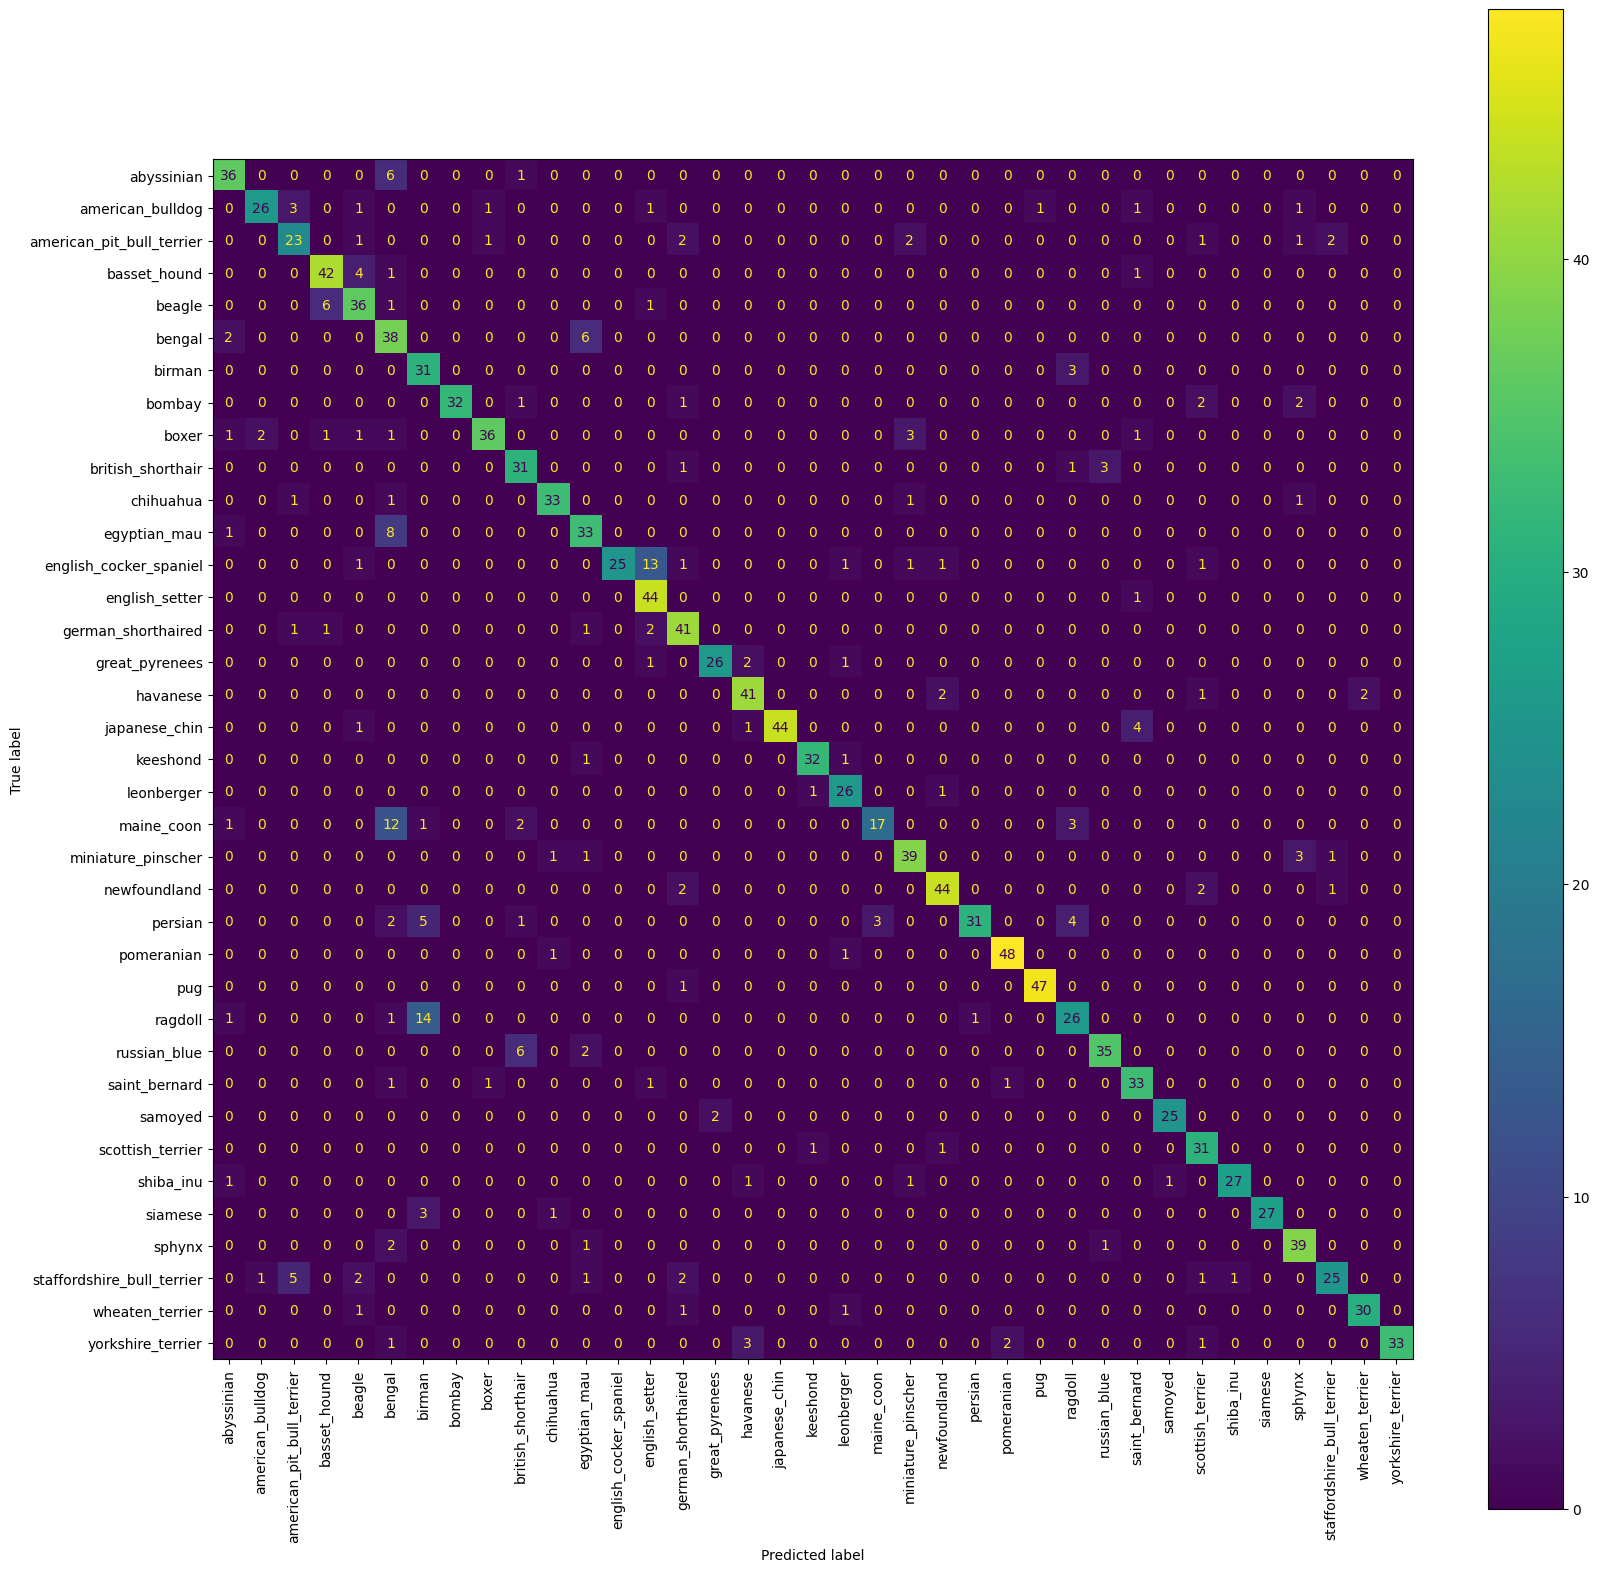

In [146]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Make predictions
y_true = []
y_pred = []

for images, labels in test:
    predictions = resnet_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig = plt.figure(figsize = (10, 10))
ax = fig.add_axes([0, 0, 1.5, 1.5])
disp.plot(ax = ax, xticks_rotation='vertical')
#disp.plot(cmap=plt.cm.Blues)
plt.show()

<h3>Задача кошки против собак</h3>

In [161]:
image_size = 224
batch_size = 32

my_seed = 322

train_bin, test_bin = [
    tf.keras.preprocessing.image_dataset_from_directory(
    'petfaces',
    image_size=(image_size, image_size),
    validation_split = 0.2,
    subset = s,
    batch_size=batch_size,
    seed = my_seed)
    for s in ['training','validation']]

class_names = train_bin.class_names

Found 3211 files belonging to 35 classes.
Using 2569 files for training.
Found 3211 files belonging to 35 classes.
Using 642 files for validation.


In [162]:
classmap = tf.constant([1 if n.startswith('cat_') else 0 for n in class_names])

def mapclass(x,y):
    return x, tf.map_fn(lambda t: classmap[t],y)
    
train_bin = train_bin.map(mapclass)
test_bin = test_bin.map(mapclass)

In [163]:
resnet_binary_model = tf.keras.models.Sequential()
resnet_binary_model.add(tf.keras.layers.Lambda(tf.keras.applications.resnet50.preprocess_input))
resnet_binary_model.add(resnet)
resnet_binary_model.add(tf.keras.layers.Flatten())
resnet_binary_model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

resnet_binary_model.layers[1].trainable = False

Epoch 1/3
81/81 [==============================] - 10s 86ms/step - loss: 0.2097 - acc: 0.9774 - val_loss: 0.0837 - val_acc: 0.9860
Epoch 2/3
81/81 [==============================] - 6s 77ms/step - loss: 0.0064 - acc: 0.9984 - val_loss: 0.0141 - val_acc: 0.9969
Epoch 3/3
81/81 [==============================] - 6s 78ms/step - loss: 8.6846e-04 - acc: 0.9996 - val_loss: 0.0222 - val_acc: 0.9984


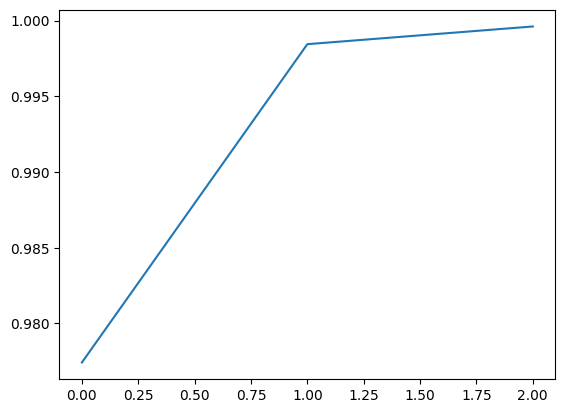

In [164]:
resnet_binary_model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')
h = resnet_binary_model.fit(train_bin,validation_data=test_bin,epochs=3)
plt.plot(h.history['acc'])

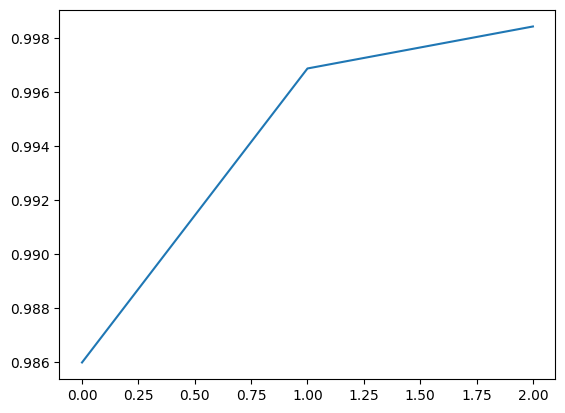

In [165]:
plt.plot(h.history['val_acc'])

In [166]:
def get_confusion_matrix(model, test):
  pred = model.predict(test, batch_size=batch_size)
  y_true = []
  y_pred = []
  y_pred = [1 * (x>=0.5) for x in pred]

  for x, l in test:
    results = l.numpy()
    for i in results:
      y_true.append(i)

  classes = ['cat', 'dog']
  cf_matrix = confusion_matrix(y_true, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = classes)
  disp.plot()
  plt.show()

21/21 [==============================] - 2s 56ms/step


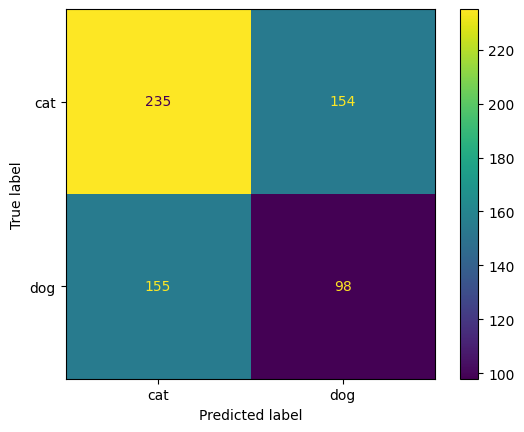

In [167]:
get_confusion_matrix(resnet_binary_model, test_bin)